In [1]:
import os
os.chdir("../..")

In [2]:
import torch
from utils.dataset_loader import load_datasets
from utils.model_utils import initialize_model
from utils.train_utils import train_model
from utils.metrics import evaluate_model
from utils.visualization import plot_training, plot_confusion_matrix

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"[INFO] Using device: {device}")

[INFO] Using device: cuda


In [4]:
data_dir = "wildfire_dataset_scaled"
batch_size = 32
num_epochs = 10
learning_rate = 0.001
num_classes = 2

In [5]:
print("[INFO] Loading augmented datasets...")
train_loader, val_loader, test_loader = load_datasets(data_dir, batch_size, augmentation="augmented")
print("[INFO] Augmented datasets loaded successfully!")



[INFO] Loading augmented datasets...
[INFO] Augmented datasets loaded successfully!


In [ ]:
print("\n[INFO] Starting Training for Model: vgg16 with Augmented Data\n")
print("[INFO] Initializing VGG16 model...")
model = initialize_model(
    model_name="convnext_tiny",
    num_classes=num_classes,
    pretrained=True,
    freeze_all=True  # Augmented data: still freeze all layers
)
print("[INFO] Model initialized successfully!")


[INFO] Starting Training for Model: vgg16 with Augmented Data

[INFO] Initializing VGG16 model...


c:\Users\Yash\Documents\Development\Projects\final_year\env\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Yash\Documents\Development\Projects\final_year\env\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[INFO] Model initialized successfully!


In [7]:
print("[INFO] Setting up loss function and optimizer...")
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)
print("[INFO] Loss function and optimizer set up!")

[INFO] Setting up loss function and optimizer...
[INFO] Loss function and optimizer set up!


In [8]:
print("[INFO] Starting model training with augmented data...")
history = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=None,  # No learning rate scheduler for this stage
    num_epochs=num_epochs,
    device=device
)
print("[INFO] Training completed successfully!")

[INFO] Starting model training with augmented data...

Starting training...



Epoch [1/10]:
    Train Loss: 0.6167, Train Acc: 0.7515
    Val Loss:   0.4590, Val Acc:   0.8433
    Learning Rate: 0.001000



Epoch [2/10]:
    Train Loss: 0.4475, Train Acc: 0.8352
    Val Loss:   0.6728, Val Acc:   0.7985
    Learning Rate: 0.001000



Epoch [3/10]:
    Train Loss: 0.4276, Train Acc: 0.8511
    Val Loss:   0.4197, Val Acc:   0.8284
    Learning Rate: 0.001000



Epoch [4/10]:
    Train Loss: 0.3962, Train Acc: 0.8649
    Val Loss:   0.6383, Val Acc:   0.8408
    Learning Rate: 0.001000



Epoch [5/10]:
    Train Loss: 0.3311, Train Acc: 0.8877
    Val Loss:   0.5780, Val Acc:   0.8358
    Learning Rate: 0.001000



Epoch [6/10]:
    Train Loss: 0.3559, Train Acc: 0.8866
    Val Loss:   0.3943, Val Acc:   0.8682
    Learning Rate: 0.001000



Epoch [7/10]:
    Train Loss: 0.2782, Train Acc: 0.9030
    Val Loss:   0.6623, Val Acc:   0.8731
    Learning Rate: 0.001000



Epoch [8/10]:
    Train Loss: 0.3288, Train Acc: 0.8983
    Val Loss:   0.5621, Val Acc:   0.8408
    Learning Rate: 0.001000



Epoch [9/10]:
    Train Loss: 0.3280, Train Acc: 0.8967
    Val Loss:   0.4719, Val Acc:   0.8632
    Learning Rate: 0.001000



Epoch [10/10]:
    Train Loss: 0.2340, Train Acc: 0.9115
    Val Loss:   0.3899, Val Acc:   0.8682
    Learning Rate: 0.001000


Training complete!

[INFO] Training completed successfully!


In [9]:
# Evaluate Model
print("[INFO] Evaluating the model...")
metrics = evaluate_model(
    model=model,
    test_loader=test_loader,
    classes=["No Fire", "Fire"],
    device=device
)
print(f"\n[INFO] Metrics for VGG16 with Augmented Data:\n{metrics}")

[INFO] Evaluating the model...

[INFO] Metrics for VGG16 with Augmented Data:
{'classification_report': {'No Fire': {'precision': 0.903448275862069, 'recall': 0.8238993710691824, 'f1-score': 0.8618421052631579, 'support': 159.0}, 'Fire': {'precision': 0.8943396226415095, 'recall': 0.9442231075697212, 'f1-score': 0.9186046511627907, 'support': 251.0}, 'accuracy': 0.8975609756097561, 'macro avg': {'precision': 0.8988939492517892, 'recall': 0.8840612393194518, 'f1-score': 0.8902233782129743, 'support': 410.0}, 'weighted avg': {'precision': 0.8978720027928971, 'recall': 0.8975609756097561, 'f1-score': 0.8965918589724452, 'support': 410.0}}, 'confusion_matrix': array([[131,  28],
       [ 14, 237]]), 'roc_auc': np.float64(0.8840612393194519)}


[INFO] Saving training and evaluation results...


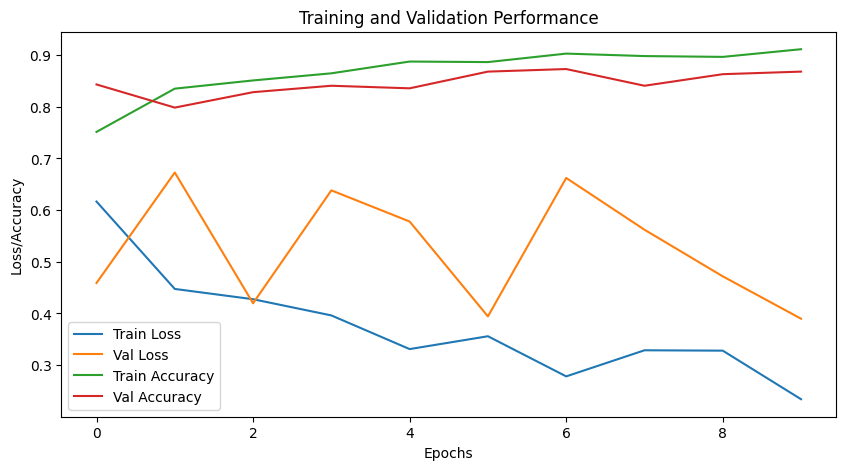

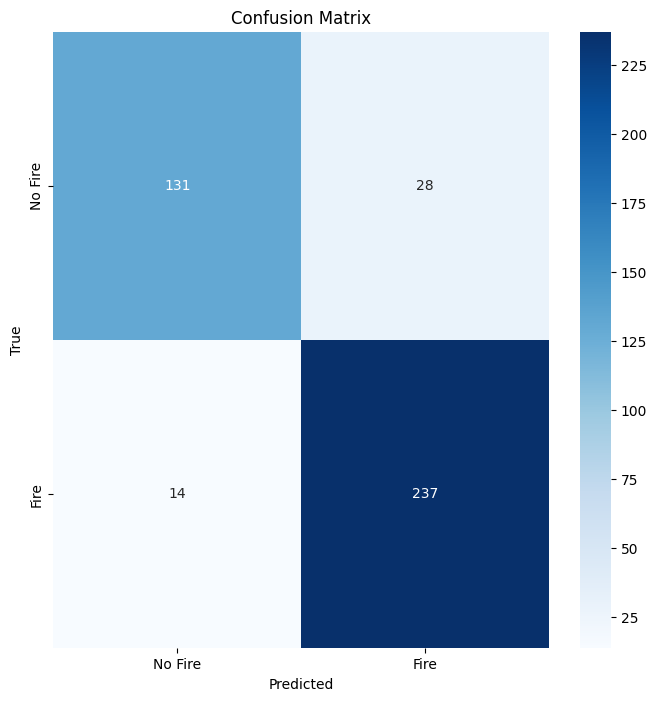

[INFO] Results saved successfully!


In [10]:
# Save Plots
print("[INFO] Saving training and evaluation results...")
plot_training(history, "outputs/vgg16_augmented_training_curve.png")
plot_confusion_matrix(
    cm=metrics["confusion_matrix"],
    classes=["No Fire", "Fire"],
    output_path="outputs/vgg16_augmented_confusion_matrix.png"
)
print("[INFO] Results saved successfully!")